## (Recursive) implementation of a binary tree

In [1]:
import numpy as np

### Definition of class `Node`

In [2]:
class Node:
    """
    In a node, one can store a float value; each node can have a left child, a right child and a parent node.
    """
    def __init__(self, parent=None, val=None):
        self.left = None
        self.right = None
        self.parent = parent
        self.value = val

    def insert(self, v):
        """
        This method is used to insert the value v below the current node
        """
        
        if v < self.value:
            if self.left == None:
                self.left = Node(self, v) #child node has "self" as parent node and contains value v
            else:
                self.left.insert(v)
        elif v > self.value:
            if self.right == None:
                self.right = Node(self, v)
            else: 
                self.right.insert(v)
    
    def find(self, v):
        """
        This method finds the node associated with value v (below the current node)
        """
        if self.value == v:
            return self
        elif v < self.value and self.left:
            return self.left.find(v)
        elif v > self.value and self.right:
            return self.right.find(v)
        else:
            print("Value %3.3f not found"%(v))
            return None
            
            
    def construct(self, l):
        """
        This method is used to construct a binary tree from scratch based on a given list of numbers l. It is assumed that all elements of l are different
        """
        
        if len(l)==1:
            self.value = l[0]
        else:
            self.value = l[np.abs(l-np.median(l)).argmin()]
            left_list = [i for i in l if i<self.value]
            right_list = [i for i in l if i>self.value]

            if len(left_list)>0:
                self.left = Node(self)
                self.left.construct(left_list)
            if len(right_list)>0:
                self.right= Node(self)
                self.right.construct(right_list)
    

    def print_node_dot(self, depth = 0, label='0', s=''):
        """
        This method returns the representation of the tree in DOT language (used by GraphViz)
        """
        if self.left == None and self.right==None: 
            s_leaf = label+ ' [label=<%3.1f>] ;' % (self.value) 
            return s_leaf
        else: # you are in an inner node
            s_node = label+ ' [label=<%3.1f>] ;' % (self.value)
            s_node_left = ""
            s_node_right=""
            s_edge_left = ""
            s_edge_right = ""
            if self.left:
                s_node_left = self.left.print_node_dot(depth+1, label+'0', s)
                s_edge_left = label+ '->' +label+'0 [labeldistance=2.5, labelangle=45];'
            if self.right:
                s_node_right = self.right.print_node_dot(depth+1, label+'1', s)
                s_edge_right = label+ '->' +label+'1 [labeldistance=2.5, labelangle=45];'         
            return s + s_node+ "\n" + s_node_left+ "\n" + s_node_right + "\n" + s_edge_left+ "\n" + s_edge_right




### Definition of class `Tree` based on the class `Node`

In [3]:
class Tree:
    def __init__(self):
        self.root = Node()
    
    def construct(self, l):
        self.root.construct(l)
        
    def insert(self, x):
        self.root.insert(x)

    def find(self, x):
        return self.root.find(x)
    
    def get_dot_data(self):
        return self.root.print_node_dot()

### Test of the tree class `Node`

In [4]:
l = [i for i in range(1,32)]
#l =[3,1,8,4,7,9,2,5,6]

tree = Tree()
tree.construct(l)

#### Vizualization using GraphViz

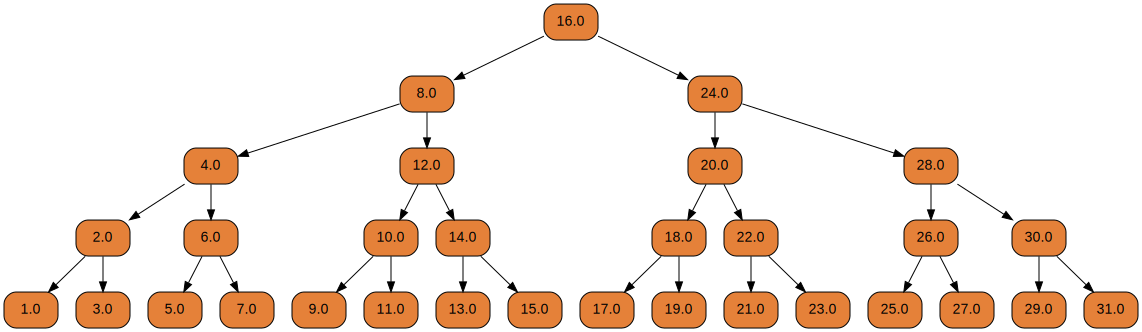

In [5]:
dot_data = tree.get_dot_data()
s1="""digraph Tree {
node [shape=box, style="filled, rounded", fillcolor="#e58139ff", fontname=helvetica] ;
edge [fontname=helvetica] ;"""
s2 = """}"""

dot_data = s1+dot_data+s2
import graphviz
graph = graphviz.Source(dot_data)
graph

In [6]:
tree.insert(32)

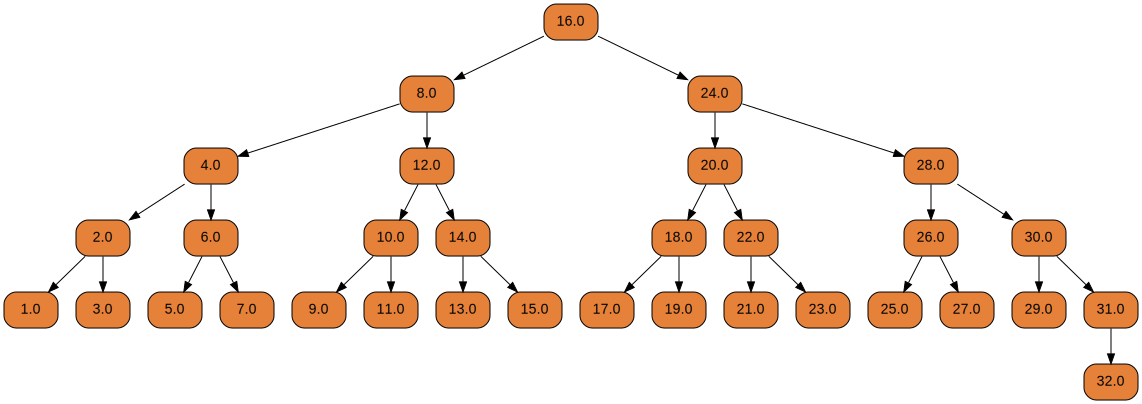

In [7]:
dot_data = tree.get_dot_data()
s1="""digraph Tree {
node [shape=box, style="filled, rounded", fillcolor="#e58139ff", fontname=helvetica] ;
edge [fontname=helvetica] ;"""
s2 = """}"""

dot_data = s1+dot_data+s2
import graphviz
graph = graphviz.Source(dot_data)
graph